<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ExerciseSubmissions/Davis-Troller_Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?).

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data.

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [12]:
library(tidyverse)
lex_data <- read.csv("LexicalData_withIncorrect.csv")
items <- read.csv("Items.csv")

items <- items %>%
  select(Word, Length, Log_Freq_HAL)

lex_data <- left_join(lex_data, items, by = c("D_Word" = "Word"))%>%
  drop_na()

nrow(lex_data) #removed about 4000 obs
head(lex_data)



[1] 70589

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

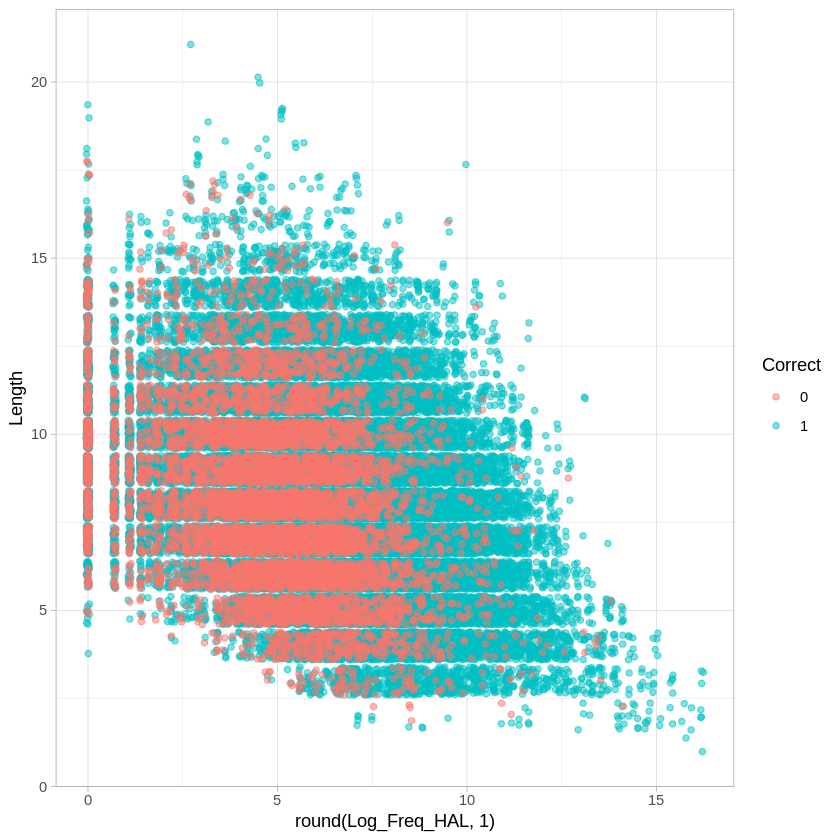

In [14]:
lex_data$Correct <- as.factor(lex_data$Correct) # so that R knows that Correct is categorical, not numeric.

# plot the Correct / Incorrect clusters
ggplot(lex_data,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light()


What do you observe about the "Correct" and "Incorrect" clusters?




>The incorrect cluster is within the word lengths of 4 to 13 instead of between 3 and 16 for correct.
> The more frequently you see the word, the more likely it is that the answer was correct. Low frequency words had greater incorrectness.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [18]:
word_lm <- glm(Correct ~ Length * Log_Freq_HAL, data = lex_data, family = binomial)

summary(word_lm)


Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = lex_data)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> The interaction of the logistic regression is significant so that means the effect of Length on Correctness depends on the value of frequency or vice versa. The realtionship between word length and correctness isn't fixed. It changes based on word frequency.


---
## 4. Interpreting predictions from the model (3 points)

# Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [26]:
install.packages("ISLR")
library(ISLR)
library(ggplot2)

lex_data = data.frame(predict(word_lm, type = "response"))
colnames(lex_data) = c('predicted_prob')

predicted_probs <- predict(word_lm, type = "response")  # Predict probabilities
predicted_classes <- ifelse(predicted_probs > 0.5, 1, 0)  # Convert to binary predictions
conf_matrix <- table(Predicted = predicted_classes, Actual = lex_data$Correct)
print(conf_matrix)






Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error in table(Predicted = predicted_classes, Actual = lex_data$Correct): all arguments must have the same length


Did the model do well at predicting lexical decision correctness? Why or why not?

> *Write your response here*  
>

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`.

*Hint: see the Classifiers tutorial.*

In [ ]:
# WRITE YOUR CODE HERE



Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy.

In [ ]:
# WRITE YOUR CODE HERE



How does QDA prediction performance differ from that of logistic regression?

> *Write your response here*
>

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*